# Product Range Analysis 

# Introduction

In 2019, there were about 1.92 billion digital buyers across the world economy. This means e-commerce is growing rapidly. As e-commerce continues to thrive, traditional brick and mortar establishments are modifying and digitalizing their business models to keep up to or beat competitions. This has increased competition in the e-commerce industry. To enhance marketing, optimize prices, to deeply understand customer expectations, etc, demands analytics. As a junior analyst at an online store that sells unique all-occasion gift-ware, my task is to analyze the store's product range between 29/11/2018 and 07/12/2019. 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Step-1:-Data-Preprocessing" data-toc-modified-id="Step-1:-Data-Preprocessing-1">Step 1: Data Preprocessing</a></span></li><li><span><a href="#Step-2:-Carry-out-exploratory-data-analysis" data-toc-modified-id="Step-2:-Carry-out-exploratory-data-analysis-2">Step 2: Carry out exploratory data analysis</a></span></li><li><span><a href="#Step-3:-Analyze-the-product-range" data-toc-modified-id="Step-3:-Analyze-the-product-range-3">Step 3: Analyze the product range</a></span></li><li><span><a href="#Step-4:-Formulate-and-test-statistical-hypotheses" data-toc-modified-id="Step-4:-Formulate-and-test-statistical-hypotheses-4">Step 4: Formulate and test statistical hypotheses</a></span></li><li><span><a href="#Step-5:-Conclusion-and-Recommendations" data-toc-modified-id="Step-5:-Conclusion-and-Recommendations-5">Step 5: Conclusion and Recommendations</a></span></li></ul></div>

##  Step 1: Data Preprocessing

I would import libraries, data, and preprocessit:
- would automate the data import and processing
- would drop duplicates in the data, convert date dypes into their right format, and create new columns
- would drop product descriptions that are not actual products but mere charges
- And filter data for only positive prices

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import missingno as msno
import seaborn as sns
from scipy import stats as st
from itertools import combinations
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
import scikitplot as skplt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_colwidth', 400)
%matplotlib inline

def data_preprocessing(dataset_path):
    try:
        df = pd.read_csv(dataset_path, sep ="\t")
        df.columns= df.columns.str.lower()
        df.description=df.description.str.lower()
        df.drop_duplicates(inplace=True)
        df["invoicedate"]= pd.to_datetime(df["invoicedate"], format = "%m/%d/%Y %H:%M")
        df["date"] = df["invoicedate"].astype("datetime64[D]")
        df=df.dropna(subset=["description"])
        df=df.query('unitprice > 0')
        df["revenue"]= df["quantity"] * df["unitprice"]
        drop_desc =["amazon fee","postage", "manual", "samples","carriage", "cruk commission", "discount", "bank charges","dotcom postage"]
        df =df[~df["description"].isin(drop_desc)]
    except:
        print("data does not fit automation")
    return df
data = data_preprocessing("ecommerce_dataset_us.csv") 
print("Data size:", data.shape[0])
print()
print("First 5 rows of data:")
display(data.head()) 
print()
print ("Data Description")
display(data.describe(include="all").T)

Data size: 531240

First 5 rows of data:


invoiceno stockcode                          description  quantity  \
0    536365    85123A   white hanging heart t-light holder         6   
1    536365     71053                  white metal lantern         6   
2    536365    84406B       cream cupid hearts coat hanger         8   
3    536365    84029G  knitted union flag hot water bottle         6   
4    536365    84029E       red woolly hottie white heart.         6   

          invoicedate  unitprice  customerid       date  revenue  
0 2018-11-29 08:26:00       2.55     17850.0 2018-11-29    15.30  
1 2018-11-29 08:26:00       3.39     17850.0 2018-11-29    20.34  
2 2018-11-29 08:26:00       2.75     17850.0 2018-11-29    22.00  
3 2018-11-29 08:26:00       3.39     17850.0 2018-11-29    20.34  
4 2018-11-29 08:26:00       3.39     17850.0 2018-11-29    20.34


Data Description


count unique                                 top  freq  \
invoiceno      531240  23196                              573585  1113   
stockcode      531240   3928                              85123A  2295   
description    531240   4033  white hanging heart t-light holder  2353   
quantity     531240.0    NaN                                 NaN   NaN   
invoicedate    531240  21308                 2019-10-29 14:41:00  1113   
unitprice    531240.0    NaN                                 NaN   NaN   
customerid   399659.0    NaN                                 NaN   NaN   
date           531240    305                 2019-12-03 00:00:00  5265   
revenue      531240.0    NaN                                 NaN   NaN   

                          first                last          mean  \
invoiceno                   NaT                 NaT           NaN   
stockcode                   NaT                 NaT           NaN   
description                 NaT                 NaT           NaN   
quantity                    NaT                 NaT      9.960477   
invoicedate 2018-11-29 08:26:00 2019-12-07 12:50:00           NaN   
unitprice                   NaT                 NaT      3.314484   
customerid                  NaT                 NaT  15288.781719   
date        2018-11-29 00:00:00 2019-12-07 00:00:00           NaN   
revenue                     NaT                 NaT      18.41553   

                     std       min      25%      50%      75%       max  
invoiceno            NaN       NaN      NaN      NaN      NaN       NaN  
stockcode            NaN       NaN      NaN      NaN      NaN       NaN  
description          NaN       NaN      NaN      NaN      NaN       NaN  
quantity      217.000645  -80995.0      1.0      3.0     10.0   80995.0  
invoicedate          NaN       NaN      NaN      NaN      NaN       NaN  
unitprice      15.830368     0.001     1.25     2.08     4.13  11062.06  
customerid   1710.786594   12346.0  13959.0  15152.0  16791.0   18287.0  
date                 NaN       NaN      NaN      NaN      NaN       NaN  
revenue       370.054268 -168469.6     3.75      9.9     17.4  168469.6

`white hanging heart t-light holder` was the most frequently ordered product ~ ordered 2353 times. Invoice number 573585 was the most frequent with 1113 products ordered. There were 4033 unique products.  The maximum ordered quantity was 80995 and the minimum ordered qunatity was -8099; why would an order be negative? Probably returned products. The data ranged between 29/11/2018 and 07/12/2019.

To conduct the `Product Range Analysis`, I would categorize the products into five main categories and an additional category called  `others` for products that do not fall in any of the created categories. As the data now has 531240 rows, and more than 4000 unique products, I will manually create categories, and train a machine learning model to complete the categorisation.

In [2]:
kitchenware =["regency cakestand 3 tier","set of 4 knick knack tins  doiley", "set of 3 cake tins pantry design", "pack of 72 retrospot cake cases",
             "jam making set with jars", "natural slate heart chalkboard", "jam making set printed",
              "recipe box pantry yellow design", "roses regency teacup and saucer", "set of 4 pantry jelly moulds", 
              "set/20 red retrospot paper napkins", "retrospot tea set ceramic 11 pc", "6 ribbons rustic charm",
             "baking set 9 piece retrospot", "set/5 red retrospot lid glass bowls", "spaceboy lunch box", 
              "set of 3 regency cake tins", "ivory kitchen scales", "hand warmer scotty dog design", 
              "red retrospot cake stand", "red kitchen scales","hand warmer bird design", "childrens apron spaceboy design", 
              "set of 12 fairy cake baking cases", "small dolly mix design orange bowl", "pack of 60 spaceboy cake cases", 
              "set of 20 kids cookie cutters", "set/6 red spotty paper plates", "hand warmer union jack", 
              "natural slate chalkboard large", "set of tea coffee sugar tins pantry", "pack of 60 pink paisley cake cases", 
              "dolly girl lunch box", "60 teatime fairy cake cases", "set of 6 spice tins pantry design", "popcorn holder", 
              "pink regency teacup and saucer", "round snack boxes set of4 woodland","pack of 20 napkins pantry design",
             "set of 3 butterfly cookie cutters", "lunch bag dolly girl design", "set of 3 heart cookie cutters",
              "set of 3 butterfly cookie cutters", "small heart measuring spoons", "red retrospot bowl", 
              "set of 12 mini loaf baking cases", "memo board retrospot  design","60 cake cases dolly girl design", 
              "regency tea plate roses","red retrospot oven glove", "small marshmallows pink bowl", "enamel bread bin cream", 
              "mint kitchen scales", "black kitchen scales", "poppy's playhouse kitchen", "kitchen metal sign", 
              "french kitchen sign blue metal", "vintage kitchen print fruits", "vintage kitchen print seafood", 
              "childrens cutlery circus parade", "pack of 20 spaceboy napkins", "baking set 9 piece retrospot",
              "childrens cutlery circus parade", "childrens cutlery dolly girl", "children's apron dolly girl"]  

home_decor=  ["wire flower t-light holder","white hanging heart t-light holder", "victorian glass hanging t-light", 
             "rabbit night light", "pink boudoir t-light holder", "hanging heart jar t-light holder", 
             "antique silver t-light glass", "chilli lights", "colour glass t-light holder hanging",
              "christmas lights 10 vintage baubles","single heart zinc t-light holder", "red toadstool led night light", 
              "glass star frosted t-light holder","fairy tale cottage night light","multi colour silver t-light holder", 
              "red toadstool led night light","set of 6 t-lights snowmen", "chilli lights", "christmas lights 10 santas", 
              "star portable table light","wooden frame antique white","black candelabra t-light holder", "snowflake portable table light", 
              "set of 6 t-lights santa", "set 10 lights night owl", "babushka lights string of 10","hyacinth bulb t-light candles",
              "wooden picture frame white finish", "red hanging heart t-light holder", "rabbit night light", 
              "rotating silver angels t-light hldr", "white metal lantern", "photo frame cornice", "no singing metal sign",
              "pottering in the shed metal sign","please one person metal sign", "gin + tonic diet metal sign","cook with wine metal sign", 
              "ladies & gentlemen metal sign", "beware of the cat metal sign", "you're confusing me metal sign","toilet sign occupied or vacant", 
              "alarm clock bakelike pink","doormat welcome to our home","doormat red retrospot","doormat keep calm and come in",
             "alarm clock bakelike red", "doormat fancy font home sweet home","doormat red retrospot","alarm clock bakelike green"]

event_and_party = ["party bunting", "assorted colour bird ornament", "heart of wicker small", 
                   "paper chain kit 50's christmas", "spotty bunting","heart of wicker large", "set/10 red polkadot party candles", 
                   "party invites jazz hearts", "party invites football","party cones carnival assorted", 
                   "retrospot party bag + sticker set", "blue party bags", "party cone christmas decoration", 
                   "tea party birthday card", "card party games", "birthday party cordon barrier tape",
                  "12 coloured party balloons", "dinosaur party bag + sticker set", "feltcraft 6 flower friends", 
                   "christmas craft little friends", "lovebird hanging decoration white", "wooden heart christmas scandinavian", 
                  "zinc metal heart decoration", "sweetheart ceramic trinket box", "scandinavian reds ribbons",
                   "world war 2 gliders asstd designs", "pink blue felt craft trinket box", "spaceboy birthday card",
                   "enamel flower jug cream", "assorted colours silk fan", "set of 72 pink heart paper doilies",
                   "metal 4 hook hanger french chateau", "feltcraft butterfly hearts", "paper chain kit vintage christmas",
                  "paper bunting retrospot", "clothes pegs retrospot pack 24", "strawberry ceramic trinket box", 
                   "jumbo bag 50's christmas", "pink fairy cake childrens apron", "jumbo bag vintage christmas", 
                   "christmas craft tree top angel", "vintage union jack bunting", "christmas decoupage candle", 
                  "christmas metal tags assorted", "rocking horse red christmas", "christmas gingham tree", 
                   "turquoise christmas tree", "pack of 12 london tissues"]

plant_and_accessories =["zinc plant pot holder", "white wood garden plant ladder", "gardeners kneeling pad keep calm", 
                        "gardeners kneeling pad cup of tea", "white anemone artificial flower", "grow your own plant in a can", 
                        "classic metal birdcage plant holder", "zinc finish 15cm planter pots", "white wood garden plant ladder",
                        "enchanted bird plant cage", "classic metal birdcage plant holder", "cream wall planter heart shaped",
                       "grow your own plant in a can", "blue pot plant candle","decorative plant pot with frieze", 
                        "pink pot plant candle", "set/3 pot plant candles","blue pot plant candle","s/2 zinc heart design planters",
                       "zinc heart lattice 2 wall planter","s/3 pink square planters roses", "white hearts wire plant pot holder",
                       "zinc hearts plant pot holder", "yellow pot plant candle"]

bags_and_toys= ["lunch bag red retrospot", "jumbo bag red retrospot", "lunch bag  black skull", 
          "jumbo bag pink polkadot","jumbo storage bag suki", "jumbo shopper vintage red paisley", "lunch bag cars blue",
          "lunch bag spaceboy design", "lunch bag suki design", "lunch bag pink polkadot", "jumbo bag apples",
          "red retrospot charlotte bag", "lunch bag woodland", "rex cash+carry jumbo shopper", "jumbo bag alphabet", 
          "gumball coat rack","red retrospot picnic bag", "suki  shoulder bag","jumbo bag toys","jumbo bag doiley patterns", 
          "red retrospot peg bag","lunch bag doiley pattern", "charlotte bag suki design", "jumbo bag vintage leaf",
           "jumbo bag pink vintage paisley","jumbo bag woodland animals", "woodland charlotte bag", "jumbo bag strawberry", 
          "lunch bag alphabet design","charlotte bag pink polkadot", "jumbo bag toys","recycling bag retrospot", 
          "lunch box i love london","jumbo bag vintage doily", "jumbo storage bag skulls", "jumbo bag spaceboy design",
           "scandinavian paisley picnic bag", "charlotte bag vintage alphabet","mr robot soft toy", "toy tidy pink polkadot", 
           "jumbo bag charlie and lola toys"]

others = ["travel card wallet keep calm", "cream sweetheart mini chest","plasters in tin strongman", 
         "white skull hot water bottle", "chocolate hot water bottle", "fawn blue hot water bottle", "gumball coat rack",
          "pantry magnetic  shopping list","love hot water bottle", "hot water bottle keep calm", "edwardian parasol natural", 
          "scottie dog hot water bottle", "home building block word", "scottie dog hot water bottle",
           "plasters in tin woodland animals", "dotcom postage", "wood black board ant white finish", 
          "travel sewing kit","knitted union flag hot water bottle", "4 traditional spinning tops", 
          "set of 6 soldier skittles", "clear drawer knob acrylic edwardian", "vintage paisley stationery set"]

Defining a function to assign categories

In [3]:
def categories(classification):
    """This function assigns categories to the product descriptions"""
    description = classification["description"]
    list_of_list=[[kitchenware, home_decor, event_and_party, plant_and_accessories, bags_and_toys, others]]
    for i in list_of_list:
        if description in i[0]:
            return "kitchenware"
        if description in i[1]:
            return "home_decor"
        if description in i[2]:
            return "event_and_party"
        if description in i[3]:
            return "plant_and_accessories"
        if description in i[4]:
            return "bags_and_toys"
        if description in i[5]:
            return "others"
        
        return "undefined"
# Applying the function to the dataframe.
data["sample_categories"] = data.apply(categories, axis =1)
data.head(10)

invoiceno stockcode                          description  quantity  \
0    536365    85123A   white hanging heart t-light holder         6   
1    536365     71053                  white metal lantern         6   
2    536365    84406B       cream cupid hearts coat hanger         8   
3    536365    84029G  knitted union flag hot water bottle         6   
4    536365    84029E       red woolly hottie white heart.         6   
5    536365     22752         set 7 babushka nesting boxes         2   
6    536365     21730    glass star frosted t-light holder         6   
7    536366     22633               hand warmer union jack         6   
8    536366     22632            hand warmer red polka dot         6   
9    536367     84879        assorted colour bird ornament        32   

          invoicedate  unitprice  customerid       date  revenue  \
0 2018-11-29 08:26:00       2.55     17850.0 2018-11-29    15.30   
1 2018-11-29 08:26:00       3.39     17850.0 2018-11-29    20.34   
2 2018-11-29 08:26:00       2.75     17850.0 2018-11-29    22.00   
3 2018-11-29 08:26:00       3.39     17850.0 2018-11-29    20.34   
4 2018-11-29 08:26:00       3.39     17850.0 2018-11-29    20.34   
5 2018-11-29 08:26:00       7.65     17850.0 2018-11-29    15.30   
6 2018-11-29 08:26:00       4.25     17850.0 2018-11-29    25.50   
7 2018-11-29 08:28:00       1.85     17850.0 2018-11-29    11.10   
8 2018-11-29 08:28:00       1.85     17850.0 2018-11-29    11.10   
9 2018-11-29 08:34:00       1.69     13047.0 2018-11-29    54.08   

  sample_categories  
0        home_decor  
1        home_decor  
2         undefined  
3            others  
4         undefined  
5         undefined  
6        home_decor  
7       kitchenware  
8         undefined  
9   event_and_party

Calculating the size and proportion of data that has been categorized manually to for training and validation.

In [4]:
display(data.query("sample_categories!='undefined'")["sample_categories"].value_counts().sum())
display(round(data.query("sample_categories!='undefined'")["sample_categories"].value_counts().sum()/data.shape[0],3))

112453

0.212

The data for training and validation is about 21% of the data. 

Filtering the manually categorized data.

In [5]:
data_selected= data.query("sample_categories!='undefined'")
display(data_selected.head())
data_selected.sample_categories.unique()

invoiceno stockcode                          description  quantity  \
0    536365    85123A   white hanging heart t-light holder         6   
1    536365     71053                  white metal lantern         6   
3    536365    84029G  knitted union flag hot water bottle         6   
6    536365     21730    glass star frosted t-light holder         6   
7    536366     22633               hand warmer union jack         6   

          invoicedate  unitprice  customerid       date  revenue  \
0 2018-11-29 08:26:00       2.55     17850.0 2018-11-29    15.30   
1 2018-11-29 08:26:00       3.39     17850.0 2018-11-29    20.34   
3 2018-11-29 08:26:00       3.39     17850.0 2018-11-29    20.34   
6 2018-11-29 08:26:00       4.25     17850.0 2018-11-29    25.50   
7 2018-11-29 08:28:00       1.85     17850.0 2018-11-29    11.10   

  sample_categories  
0        home_decor  
1        home_decor  
3            others  
6        home_decor  
7       kitchenware

array(['home_decor', 'others', 'kitchenware', 'event_and_party',
       'bags_and_toys', 'plant_and_accessories'], dtype=object)

Training the text data with a Naive Base algorithm, validation, and  reports on the model performance.

'                       precision    recall  f1-score   support\n\n        bags_and_toys       1.00      1.00      1.00      5675\n      event_and_party       1.00      0.98      0.99      3961\n           home_decor       1.00      1.00      1.00      4198\n          kitchenware       0.98      1.00      0.99      6199\n               others       1.00      1.00      1.00      2197\nplant_and_accessories       1.00      1.00      1.00       261\n\n             accuracy                           1.00     22491\n            macro avg       1.00      1.00      1.00     22491\n         weighted avg       1.00      1.00      1.00     22491\n'

	Accuracy: 1.00
	Precision: 1.00
	Recall: 1.00


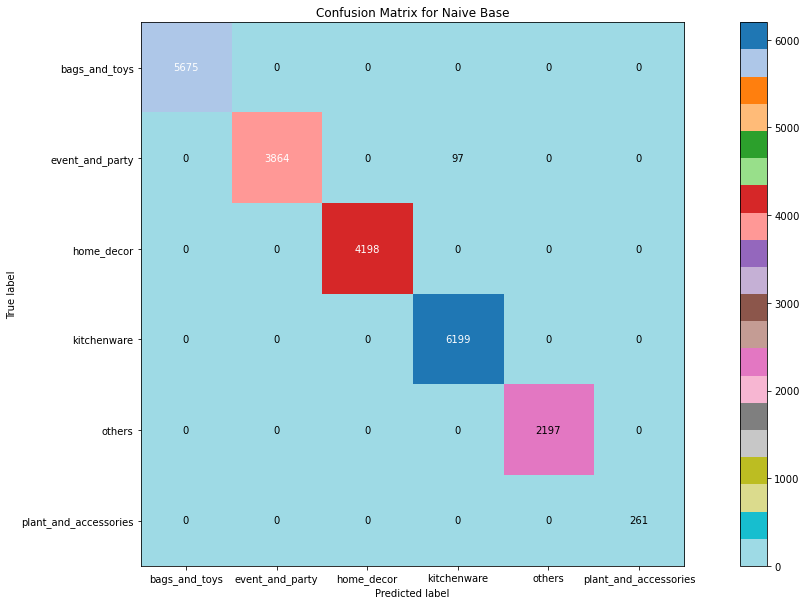

In [6]:
def training_the_model(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=42)
    global nb_model
    nb_model = make_pipeline(TfidfVectorizer(), MultinomialNB()) 
    nb_model.fit(X_train, y_train) 

    label=nb_model.predict(X_test)

    mtrx= confusion_matrix(y_test,label)

    display(classification_report(y_test, label))
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_test,label)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_test,label, average='weighted')))
    print('\tRecall: {:.2f}'.format(recall_score(y_test,label, average='weighted')))
    skplt.metrics.plot_confusion_matrix(y_test,label,cmap='tab20_r',figsize= (20,10), \
                                    title= "Confusion Matrix for Naive Base")
    return plt.show()
training_the_model(data_selected.description, data_selected.sample_categories)

The model does extremely well as it rarely made an error in the text prediction. It has an accuracy of about 100%. As evidenced in the confusion matrix, only 97 products of `events_and_party` were categorized as `kitchenware`. All the other categories were predicted exactly as the true label. 

Using the trained model to categorize.

In [7]:
data["categories"]= nb_model.predict(data["description"])
data.head(10)

invoiceno stockcode                          description  quantity  \
0    536365    85123A   white hanging heart t-light holder         6   
1    536365     71053                  white metal lantern         6   
2    536365    84406B       cream cupid hearts coat hanger         8   
3    536365    84029G  knitted union flag hot water bottle         6   
4    536365    84029E       red woolly hottie white heart.         6   
5    536365     22752         set 7 babushka nesting boxes         2   
6    536365     21730    glass star frosted t-light holder         6   
7    536366     22633               hand warmer union jack         6   
8    536366     22632            hand warmer red polka dot         6   
9    536367     84879        assorted colour bird ornament        32   

          invoicedate  unitprice  customerid       date  revenue  \
0 2018-11-29 08:26:00       2.55     17850.0 2018-11-29    15.30   
1 2018-11-29 08:26:00       3.39     17850.0 2018-11-29    20.34   
2 2018-11-29 08:26:00       2.75     17850.0 2018-11-29    22.00   
3 2018-11-29 08:26:00       3.39     17850.0 2018-11-29    20.34   
4 2018-11-29 08:26:00       3.39     17850.0 2018-11-29    20.34   
5 2018-11-29 08:26:00       7.65     17850.0 2018-11-29    15.30   
6 2018-11-29 08:26:00       4.25     17850.0 2018-11-29    25.50   
7 2018-11-29 08:28:00       1.85     17850.0 2018-11-29    11.10   
8 2018-11-29 08:28:00       1.85     17850.0 2018-11-29    11.10   
9 2018-11-29 08:34:00       1.69     13047.0 2018-11-29    54.08   

  sample_categories       categories  
0        home_decor       home_decor  
1        home_decor       home_decor  
2         undefined  event_and_party  
3            others           others  
4         undefined       home_decor  
5         undefined       home_decor  
6        home_decor       home_decor  
7       kitchenware      kitchenware  
8         undefined      kitchenware  
9   event_and_party  event_and_party

Droping the manually created categories. 

In [8]:
data.drop(['sample_categories'], axis=1, inplace=True)

Dividing the data into cancelled orders and non-cancelled orders. 

In [9]:
cancelled_orders= data[data.invoiceno.str.contains("C", na=False)][data["quantity"]<0]
cancelled_orders = data.query("invoiceno in @cancelled_orders.invoiceno")
cancelled_orders.head()

invoiceno stockcode                        description  quantity  \
154   C536383    35004C    set of 3 coloured  flying ducks        -1   
235   C536391     22556     plasters in tin circus parade        -12   
236   C536391     21984   pack of 12 pink paisley tissues        -24   
237   C536391     21983   pack of 12 blue paisley tissues        -24   
238   C536391     21980  pack of 12 red retrospot tissues        -24   

            invoicedate  unitprice  customerid       date  revenue  \
154 2018-11-29 09:49:00       4.65     15311.0 2018-11-29    -4.65   
235 2018-11-29 10:24:00       1.65     17548.0 2018-11-29   -19.80   
236 2018-11-29 10:24:00       0.29     17548.0 2018-11-29    -6.96   
237 2018-11-29 10:24:00       0.29     17548.0 2018-11-29    -6.96   
238 2018-11-29 10:24:00       0.29     17548.0 2018-11-29    -6.96   

          categories  
154  event_and_party  
235           others  
236      kitchenware  
237      kitchenware  
238      kitchenware

In [10]:
orders_data= data.query("invoiceno not in @cancelled_orders.invoiceno")
orders_data.shape

(522572, 10)

**Interim Conclusion**

I have ensured that data have the right data types, duplicates  have been checked, and missing values have been delth with. I have investigated outliers in the data, and categorized the products. New columns, i.e. `revenue`, and `categories` have been created. Hence, the data is ready for analysis.

## Step 2: Carry out exploratory data analysis

**Leading orders by invoice**

In [11]:
top_invoices= orders_data.invoiceno.value_counts().to_frame()
top_invoices.rename(columns={"invoiceno":"invoice_count"}).head(10).T

573585  581219  581492  580729  558475  579777  581217  537434  \
invoice_count    1113     748     730     720     704     686     675     674   

               580730  538071  
invoice_count     661     650

Invoice number 573585 had the highest number of products ordered (1113 products). My assertion is that top ten invoices count indicate that the customers of the store are most likely wholesalers. 

**What are the most frequently purchased categories?**

I will count invoice numbers by categories and visualize. 

In [12]:
frequent_categories= orders_data.groupby("categories")["invoiceno"].nunique().sort_values(ascending=True).to_frame().reset_index()\
.rename(columns={"invoiceno":"invoice_count"})

fig = px.bar(frequent_categories, y='categories', x='invoice_count',orientation = "h",title= "<b>Most Frequently Purchased Categories</b>", text='invoice_count')
fig.update_layout(
    showlegend=False,
    margin=dict(t=30,l=8,b=8,r=10))
fig.update_traces(texttemplate='%{text:.3s}', textposition='outside')
fig.update_yaxes(tickfont_family="Arial Black", title_text="<b>Categories</b>")
fig.update_xaxes(tickfont_family="Arial Black", title_text="<b>Invoice Count</b>")

fig.show()

`kitchenware` is the most frequently purchased category, `plant_and_accessories` is the least frequently purchased category.

**How many orders do they make during a given period of time?**

I will visualize the number of daily orders for the entire period and the number of monthly orders.

In [13]:
fig = px.line(orders_data.groupby('date')['invoiceno'].nunique().reset_index(),x="date", y="invoiceno", 
              title="<b>Daily Orders</b>")

fig.update_layout(
    showlegend=True,
    margin=dict(t=30,l=8,b=8,r=10))
fig.update_xaxes(tickfont_family="Arial Black", title_text="<b>Invoice Date</b>")
fig.update_yaxes(tickfont_family="Arial Black", title_text="<b>Invoice Count</b>")

fig.show()

The highest daily orders was on November 30th, 2018, followed by November 15th, 2019 (141 and 136 orders respectively). The lowest daily order was on 4th February 2019 (just 11 orders)

In [15]:
import plotly.express as px
fig = px.line(orders_data.groupby([orders_data['invoicedate'].astype("datetime64[M]")])['invoiceno'].nunique().reset_index(),
              x="invoicedate", y="invoiceno", title="<b>Monthly Orders</b>", line_shape= "spline", markers= True)

fig.update_layout(
    showlegend=True,
    margin=dict(t=30,l=8,b=8,r=10))
fig.update_xaxes(tickfont_family="Arial Black", title_text="<b>Invoice Date</b>")
fig.update_yaxes(tickfont_family="Arial Black", title_text="<b>Invoice Count</b>")

fig.show()

Excluding November 2018 and December 2019 (as we only have less than 8 days of orders), The number of total monthly orders improved a lot from December 2018 to November 2019, i.e. from 1282 orders to 2831 orders- about 121% increament.

**What are the top ten products by revenue?**

In [15]:
top_products= orders_data.groupby("description")["revenue"].sum().to_frame().sort_values(by ="revenue", ascending=True)\
.reset_index().head(10)

fig = px.bar(top_products, y='description', x='revenue',title= "<b>Top 10 Products by Revenue</b>",  text='revenue')
fig.update_layout(
    showlegend=False,
    margin=dict(t=30,l=8,b=8,r=10))
fig.update_traces(texttemplate='%{text:.3s}', textposition='outside')
fig.update_layout(xaxis_tickprefix = '£', xaxis_tickformat = ',.2f')
fig.update_yaxes(tickfont_family="Arial Black", title_text="<b>Products</b>")
fig.update_xaxes(tickfont_family="Arial Black", title_text="<b>Revenue (Million)</b>")

fig.show()

`regency cakestand 3 tier` and `paper craft, little birdie` are the top two products in term of revenue generations. `regency cakestand 3 tier` generated a revenue amounting to about £174,200 - the highest.

**What products get cancelled the most?**

In [16]:
frequently_cancelled_products= cancelled_orders.groupby("description")["invoiceno"].nunique().sort_values(ascending=True).to_frame().reset_index()\
.rename(columns={"invoiceno":"invoice_count"}).tail(10)

fig = px.bar(frequently_cancelled_products, y='description', x='invoice_count',title= "<b>Most Frequently Cancelled Products</b>", text='invoice_count')
fig.update_layout(
    showlegend=False,
    margin=dict(t=30,l=8,b=8,r=10))
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_yaxes(tickfont_family="Arial Black", title_text="<b>Products</b>")
fig.update_xaxes(tickfont_family="Arial Black", title_text="<b>Invoice Count</b>")
fig.show()

Interestinely, `regency cakestand 3 tier` is generating the highest revenue but it gets cancelled the most.

**Are there seasonalities in revenues?**

I will visualize daily revenues

In [17]:
fig = px.line(orders_data.groupby(orders_data['invoicedate'].astype("datetime64[D]"))["revenue"].sum()\
                                              .reset_index(),x="invoicedate", y="revenue",title= "<b>Daily Revenues</b>")
 
fig.update_layout(
    showlegend=True,
    margin=dict(t=30,l=8,b=8,r=10))
fig.update_layout(yaxis_tickprefix = '£')
fig.update_yaxes(tickfont_family="Arial Black", title_text="<b>Revenue</b>")
fig.update_xaxes(tickfont_family="Arial Black", title_text="<b>Invoice Date</b>")

fig.show()

Revenue from December 7, 2019 is extreme, so the plot is not fitting well. Also, November 2018 and December 2019 have just fews days of data, I will filter these months out and plot again; this time, I will plot per month.

In [16]:
fig = px.line(orders_data.groupby(orders_data[(orders_data["date"]>= "2018-12-01") & (orders_data["date"]<= "2019-11-30")]['invoicedate']\
                                  .astype("datetime64[M]"))["revenue"].sum().reset_index(),x="invoicedate", y="revenue",\
              title= "<b>Total Monthly Revenues</b>", line_shape= "spline", markers= True)
 
fig.update_layout(
    showlegend=True,
    margin=dict(t=30,l=8,b=8,r=10))
fig.update_layout(yaxis_tickprefix = '£')
fig.update_yaxes(tickfont_family="Arial Black", title_text="<b>Total Revenue</b>")
fig.update_xaxes(tickfont_family="Arial Black", title_text="<b>Invoice Date</b>")

fig.show()

Even though revenues were low in December 2018 and infact, 20th December 2018 accounted for the lowest revenue, the 2018 data only has two days in November and then December, so arguements could not be raised as probably, the previous months had better or lower revenue. Looking at 2019, it is evident there exit seasonality in revenues as total monthly revenues from January to July 2019 are below £800,000 but revenues were comparatively higher from August to November 2019. Looking at the First graph on daily reveues, December 7, 2019 had the highest revenue - about £198,000.

**Interim Conclusion**

- Invoice number `573585` had the highest number of products ordered (1113 products). The top ten invoices shows the customers of the store are mostly wholesalers.
- `Kitchen ware` is the most frequently purchased category, `plant and accessories` are the least frequently purchased category.
- The highest daily orders was on November 30th, 2018, followed by November 15th, 2019 (141 and 136 orders respectively). The lowest daily order was on 4th February 2019 - just 11 orders.
-  The number of total monthly orders from December 2018 to November increased by about 121%.
- `Regency cakestand 3 tier` and `paper craft, little birdie` are the top two products in term of revenue generations. `Regency cakestand 3 tier` generated a revenue amounting to about £174,200 - the highest.
- The most cancelled product order is `Regency cakestand 3 tier` - cancelled 180 times.
- Revenues are comparatively lower from January to July and higher from August to November.


## Step 3: Analyze the product range

**Average Revenue (top individual products, and categories)**

In [19]:
leading_avg_revenues= orders_data.groupby("description")["revenue"].mean().sort_values(ascending=True).to_frame().reset_index()\
.head(10)

fig = px.bar(leading_avg_revenues, y='description', x='revenue',title= "<b>Top 10 Average Revenue by Products</b>", text='revenue')
fig.update_layout(
    showlegend=False,
    margin=dict(t=30,l=8,b=8,r=10))
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(xaxis_tickprefix = '£')
fig.update_yaxes(tickfont_family="Arial Black", title_text="<b>Products</b>")
fig.update_xaxes(tickfont_family="Arial Black", title_text="<b>Revenue (Million)</b>")

fig.show()

`Regency cakestand 3 tier` had the highest sum of revenues but on average, `paper craft, little birdie` generated the highest revenue ~ £168,469. 

I will proceed with average revenue by category.

In [20]:
leading_avg_revenues= orders_data.groupby("categories")["revenue"].mean().sort_values(ascending=True).to_frame().reset_index()\
.head(10)

fig = px.bar(leading_avg_revenues, y='categories', x='revenue', orientation = "h", title= "<b>Average Revenue by Category</b>", text='revenue')
fig.update_layout(
    showlegend=False,
    margin=dict(t=30,l=8,b=8,r=1))
fig.update_traces(texttemplate='%{text:.3s}', textposition='outside')
fig.update_layout(xaxis_tickprefix = '£', xaxis_tickformat = ',.2f')
fig.update_yaxes(tickfont_family="Arial Black", title_text="<b>Categories</b>")
fig.update_xaxes(tickfont_family="Arial Black", title_text="<b>Revenue</b>")

fig.show()

Even though `Kitchen ware`is the most frequently ordered category, on average, it generated the least revenue - about £18; `home decorations` generated the highest average revenue ~ £23. Are these averages statistically and significantly different?

**Which products are most often sold together**

I will combine pairs of products (bundles) and count the number of times they were sold together.

In [21]:
orders_data["product_bundle"]=orders_data.groupby('invoiceno')['description'].transform(lambda x: ';'.join(x))
product_bundle= orders_data[['invoiceno', "product_bundle"]].drop_duplicates()

count = Counter()
for row in product_bundle["product_bundle"]:
    row_list = row.split(';')
    count.update(Counter(combinations(row_list,2)))
paired=count.most_common(10)
df = pd.DataFrame(paired,columns=['combinations', "count"])
df

combinations  count
0                   (jumbo bag pink polkadot, jumbo bag red retrospot)    541
1  (green regency teacup and saucer, roses regency teacup and saucer )    485
2         (jumbo shopper vintage red paisley, jumbo bag red retrospot)    465
3                    (jumbo storage bag suki, jumbo bag red retrospot)    453
4                   (lunch bag red retrospot, lunch bag  black skull.)    427
5    (green regency teacup and saucer, pink regency teacup and saucer)    396
6            (jumbo bag red retrospot, jumbo  bag baroque black white)    393
7                          (jumbo bag apples, jumbo bag red retrospot)    389
8                (woodland charlotte bag, red retrospot charlotte bag)    379
9              (alarm clock bakelike green, alarm clock bakelike red )    375

There were so many products that were sold together, but `Jumbo bag and pink polkadot` and `jumbo bag red retrospot` were the products most often sold together.

**Which products are more often sold by themselves, and which ones are more often combined with others?**

I will group by invoice number and uniquely count products that were sold alone. 

In [22]:
by_themselves = orders_data.groupby("invoiceno")["description"].nunique().reset_index()\
.rename(columns={"description": "item_count"}).query("item_count <2")
display(by_themselves.head())
display(by_themselves.shape[0])

invoiceno  item_count
4     536369           1
6     536371           1
9     536374           1
14    536380           1
25    536393           1

1501

Let's visualize: individual products.

In [23]:
main_products= orders_data.query("invoiceno in @by_themselves.invoiceno")
main_products= main_products["description"].value_counts().to_frame().reset_index().rename(columns={"index": "description", "description": "count"})
fig = px.bar(main_products.head(15).sort_values(by= 'count',ascending=True), y='description', x='count',orientation = "h",title= "<b>Top 15 Products Sold by Themselves</b>",  text='count')
fig.update_layout(
    showlegend=False,
    margin=dict(t=30,l=8,b=8,r=10))
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_yaxes(tickfont_family="Arial Black", title_text="<b>Products</b>")
fig.update_xaxes(tickfont_family="Arial Black", title_text="<b>Count</b>")

fig.show()
       

There were 1501 products that were sold by themselves. `Rabbit night light` was sold alone 32 time ~ the most sold alone product. 

Let's visualize: additional assortment products.

In [24]:
additional_products= orders_data.query("invoiceno  not in @by_themselves.invoiceno")
additional_products= additional_products["description"].value_counts().to_frame().reset_index().rename(columns={"index": "description", "description": "count"})
fig = px.bar(additional_products.head(15).sort_values(by= 'count',ascending=True), y='description', x='count',orientation = "h",title= "<b>Top 15 Additional Assortment Products</b>", text='count')
fig.update_layout(
    showlegend=False,
    margin=dict(t=30,l=8,b=8,r=10))
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_yaxes(tickfont_family="Arial Black", title_text="<b>Products</b>")
fig.update_xaxes(tickfont_family="Arial Black", title_text="<b>Count</b>")

fig.show()

In [25]:
print(str(round(((orders_data.shape[0] - by_themselves.shape[0])/orders_data.shape[0])*100,2))+"%")

99.71%


About 99.7% of the products were sold together with others - additional assortment. `White hanging heart t-light holder` was the product sold the most with others - about 2300 times. 

**What product groups are more often included in the additional assortment?**

In [26]:
additional_group_assortment = orders_data.groupby("invoiceno")["categories"].nunique().reset_index()\
.rename(columns={"categories": "item_count"}).query("item_count > 1")

additional_product_group= orders_data.query("invoiceno in @additional_group_assortment.invoiceno")
additional_product_group= additional_product_group["categories"].value_counts().to_frame().reset_index().rename(columns={"index": "categories", "categories": "count"})
fig = px.bar(additional_product_group.sort_values(by= 'count',ascending=True), y='categories', x='count', orientation ="h", title= "<b>Top Additional Assortment Categories</b>",text='count')
fig.update_layout(
    showlegend=False,
    margin=dict(t=30,l=2,b=5,r=1), )
fig.update_traces(texttemplate='%{text:.3s}', textposition='outside')
fig.update_yaxes(tickfont_family="Arial Black", title_text="<b>Categories</b>")
fig.update_xaxes(tickfont_family="Arial Black", title_text="<b>Count</b>")

fig.show()

`Kitchen ware` was most often included in additioanl assortment (about 152,610 times) and `plant and accessories` was the least - about 15,840 times. 

**What bundles of product groups are often present in shopping carts?** 

I will combine pairs of product categories (bundles) and count the number of times they were sold together.

In [27]:
orders_data["categories_bundle"]=orders_data.groupby('invoiceno')['categories'].transform(lambda x: ';'.join(x))
categories_bundle= orders_data[['invoiceno', "categories_bundle"]].drop_duplicates()
count = Counter()
for row in categories_bundle["categories_bundle"]:
    row_list = row.split(';')
    count.update(Counter(combinations(row_list,2)))
paired1=count.most_common(10)
df1 = pd.DataFrame(paired1,columns=['combinations', "count"])
df1

combinations    count
0          (kitchenware, kitchenware)  2694220
1      (event_and_party, kitchenware)  2272974
2      (kitchenware, event_and_party)  2025698
3  (event_and_party, event_and_party)  1900017
4           (kitchenware, home_decor)  1374740
5           (home_decor, kitchenware)  1351066
6        (bags_and_toys, kitchenware)  1324704
7       (event_and_party, home_decor)  1231966
8        (kitchenware, bags_and_toys)  1173235
9       (home_decor, event_and_party)  1091238

It can be observed that range of products under `Kitchen ware` were mostly present in shopping carts. Considering the groups, `event and party`category was mostly present in shopping carts with  `Kitchen ware`

**Interim Conclusion**

- on average, `paper craft, little birdie` generated the highest revenue - about £168,469.
- on average, `Kitchen ware` generated the least revenue - about £18 while `home decorations` generated the highest- about £23.
- There were 1501 products that were sold by themselves. `Rabbit night light` was sold alone 32 times- the most sold alone product. 
-  About 99.7% of the products were sold together with others - additional assortment.
- `Jumbo bag and pink polkadot` and `jumbo bag red retrospot` were the products most often sold together. 
- `White hanging heart t-light holder` was the product sold the most with others - about 2300 times. 
 `Kitchen ware` was most often included in additioanl assortment (about 152,610 times) and `plant and accessories` was the least - about 15,840 times. 
- `event and party`category was mostly present in shopping carts with  `Kitchen ware`

## Step 4: Formulate and test statistical hypotheses

I will formulate two hypotheses and test. Since these would be test of averages, I will used t-test; I will first conduct levene test for variance to be a able to pass the right option in the test, i.e. equal or non-equal variance.

**Hypothesis 1:**

H0: There is no statistically significant difference in average revenue from categoires, `home_decor` and `kitchenware`. 

H1: There is statistically significant difference in average revenue from categoires, `home_decor` and `kitchenware`. 

Alpha = 0.05

In [28]:
home_decor = orders_data[orders_data["categories"]=="home_decor"]
kitchenware = orders_data[orders_data["categories"]=="kitchenware"]

alpha = .05 
result = st.levene(home_decor["revenue"], kitchenware["revenue"])

print('p-value (levene test): {:.4f}'.format(result.pvalue))


if (result.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value (levene test): 0.0000
We reject the null hypothesis


In [29]:
alpha = .05 
home_decor = orders_data[orders_data["categories"]=="home_decor"]
kitchenware = orders_data[orders_data["categories"]=="kitchenware"]
result = st.ttest_ind(home_decor["revenue"], kitchenware["revenue"],equal_var=False)

print('p-value: {:.4f}'.format(result.pvalue))

if (result.pvalue < alpha):
        print("We reject H0: there is statistically significant difference between average revenue from categoires home decor and kitchen ware.")
else:
        print("We can't reject H1: there is statistically no significant difference between average revenue from categoires home decor and kitchen ware.")

p-value: 0.0000
We reject H0: there is statistically significant difference between average revenue from categoires home decor and kitchen ware.


**Hypothesis 2:**

H0: There is statistically no significant difference in average revenue from the product `paper craft , little birdie` and all other products.

H1: There is statistically significant difference in average revenue from the product `paper craft , little birdie` and all other products. 

Alpha = 0.05

In [30]:
alpha = .05 

papar_craft = orders_data[orders_data["description"]=="paper craft , little birdie"]
non_paper_craft = orders_data[orders_data["description"]!="paper craft , little birdie"]
        
results = st.levene(papar_craft["revenue"], non_paper_craft["revenue"])

print('p-value (levene test): {:.4f}'.format(results.pvalue))


if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value (levene test): 0.9123
We can't reject the null hypothesis


In [31]:
alpha = .05 

result = st.ttest_ind(papar_craft["revenue"], non_paper_craft["revenue"],equal_var=True)

print('p-value: {:.4f}'.format(results.pvalue))

if (results.pvalue < alpha):
        print("We reject H0: there is statistically significant difference between average revenue from the product 'paper craft, little birdie' and all other products.")
else:
        print("We can't reject H0: there is statistically no significant difference between average revenue from the product 'paper craft, little birdie' and all other products.")

p-value: 0.9123
We can't reject H0: there is statistically no significant difference between average revenue from the product 'paper craft, little birdie' and all other products.


## Step 5: Conclusion and Recommendations

**Conclusion**
.
- There were 4206 unique products. The maximum ordered quantity was 80995.
- The quantity of products ordered had a mean of about 10 and a standard deviation of about 219. 
- The highest unit price of a product costed £38,970.00.  
- Unit price had a mean on about £4.6. 
- Invoice number `573585` had the highest number of products ordered (1113 products). The top ten invoices show the customers of the store are mostly wholesalers.
- `Kitchen ware` is the most frequently purchased category, `plant and accessories` are the least frequently purchased category.
- The highest daily orders was on November 30th 2018, followed by November 15th 2019 (141 and 136 orders respectively). The lowest daily order was on 4th February 2019 - just 11 orders.
-  The number of total monthly orders from December 2018 to November 2019 increased by about 121%.
- Revenues are comparatively lower from January to July and higher from August to November.
- `Regency cakestand 3 tier` and `paper craft little birdie` are the top two products in terms of revenue generation. `Regency cakestand 3 tier` generated a revenue amounting to about £174,200.00 - the highest.
- The most cancelled product order is `Regency cakestand 3 tier` - cancelled 180 times.
- On average, `paper craft, little birdie` generated the highest revenue - about £168,469.
- On average, `Kitchen ware` generated the least revenue - about £18 while `home decorations` generated the highest- about £23.
- There were 1501 products that were sold by themselves. `Rabbit night light` was sold alone 32 times- the most sold alone product. 
-  About 99.7% of the products were sold together with others - additional assortment.
- `Jumbo bag and pink polkadot` and `jumbo bag red retrospot` were the products most often sold together. 
- `White hanging heart t-light holder` was the product sold the most with others - about 2300 times. 
 `Kitchen ware` was most often included in additioanl assortment (about 152,610 times) and `plant and accessories` was the least - about 15,840 times. 
- `event and party`category was mostly present in shopping carts with  `Kitchen ware`

- The difference between average revenue from `home decorations` and  `Kitchen ware` statistically significant. 
- The average revenue generated by `paper craft little birdie` is not statistically and significantly different from average revenue from all other products. 

**Recommendations**

- Since about 99.7% of products are included in additional assortment, there is a need to create a product recommendation system.
- `Home decorations` is the third most purchased category but has the highest average revenue. Hence, invest more in advertising `home decorations` to boost purchase rate and revenue. 
- As `plant and accessories` is the least frequently purchased category, increase advertising investment to enhance orders.
- `Regency cakestand 3 tier` is the leading revenue generator on aggragate but the most cancelled product order. Pay much attention to this product. For instance, why does it often get cancelled? If the cancellation rate is minimized, revenue would be maximized. 

**References**

- [6 Benefits of Big Data Analytics for E-Commerce](https://www.octoparse.com/blog/benefits-of-big-data-analytics-for-e-commerce)
- [Guide to Text Classification with Machine Learning & NLP](https://monkeylearn.com/text-classification/) 
- [Text Classification Using Naive Bayes](https://youtu.be/60pqgfT5tZM)
- [Product Sales Analysis](https://medium.com/swlh/product-sales-analysis-using-python-863b29026957)